In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

from PointTracking import PointTracker as pt
from classicalfield_orig import FiniteTempGPE as gpe

In [ ]:
g = gpe(npoints = 2**6, numImagSteps = 2000, numRealSteps = 60000, dtcoef = 0.0005, boxthickness = 0.4, Nsamples = 1, runAnim = True, animFileName = 'test.mp4', Tfact = 1/7, dst = False, vortex = True)

Total Imag Time:  1.3562586307525635
kmax:  4.0212385965949355
T:  1.155025703624629


In [3]:
tracker = pt(g.snaps, g.dx, g.L) # initialize tracker object to track the vortices in each frame of snaps 

In [4]:
for point in tracker.points: 
    print(point.getCoors())

(24.609375, 24.609375)
(28.515625, 24.609375)


Text(0, 0.5, 'x')

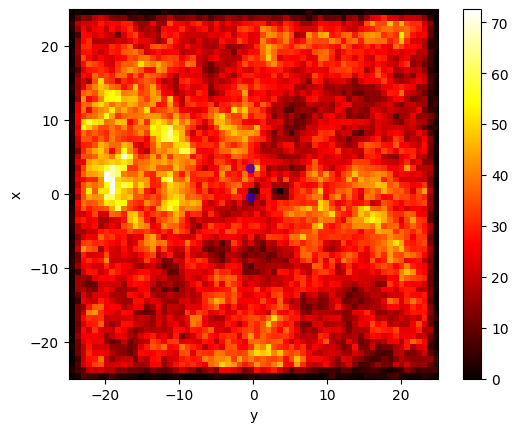

In [5]:
psi = g.snaps[0] 
L = g.L
dx = g.dx 
box = psi[int(L/2/dx):int(3*L/2/dx), int(L/2/dx):int(3*L/2/dx)]
plt.figure() 
plt.imshow(np.abs(box)**2, cmap = plt.cm.hot, origin = 'lower', extent = [-L/2, L/2, -L/2, L/2])
plt.colorbar() 
for point in tracker.points: 
    plt.scatter(point.getCoors()[1]-L/2,point.getCoors()[0]-L/2, color = 'blue', alpha = 0.5)
plt.xlabel('y')
plt.ylabel('x')


### Test the tracking when a new vortex is detected 

In [6]:
print(np.shape(g.snaps))
snap = 8

(241, 128, 128)


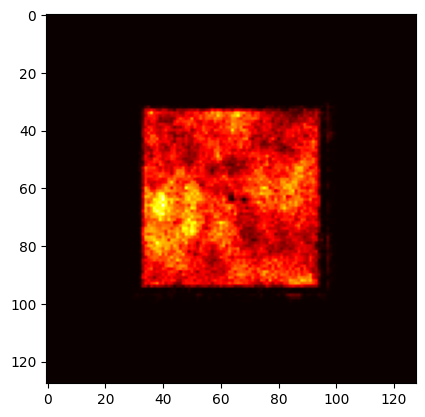

In [7]:
plt.figure() 
plt.imshow(np.abs(g.snaps[snap])**2, cmap = plt.cm.hot)
plt.show() 

In [8]:
for snapshot in g.snaps: 
    vortices, antivortices = pt.detectVortices(tracker, snapshot)
    if len(vortices) + len(antivortices) > 2: 
        print(snapshot) 
        break 

In [9]:
print(len(vortices) )
print(len(antivortices))

0
2


In [10]:
for i in range(len(g.snaps)): 
    vortices, antivortices = pt.detectVortices(tracker, g.snaps[i])
    if i%50 == 0: 
        
        print(i, " Vortices: ", vortices) 
        print(i, " AntiVortices: ", antivortices) 
    if len(vortices) + len(antivortices) > 2: 
        print("More vortices") 
    elif len(vortices) + len(antivortices) < 2: 
        print(i, " fewer vortices")

0  Vortices:  []
0  AntiVortices:  [[24.609375 24.609375]
 [28.515625 24.609375]]
50  Vortices:  []
50  AntiVortices:  [[24.609375 23.828125]
 [27.734375 26.171875]]
100  Vortices:  []
100  AntiVortices:  [[25.390625 22.265625]
 [27.734375 26.953125]]
150  Vortices:  []
150  AntiVortices:  [[26.171875 22.265625]
 [26.953125 26.953125]]
200  Vortices:  []
200  AntiVortices:  [[26.953125 22.265625]
 [26.171875 27.734375]]


In [11]:
# run the label vortices function to test 

pt.labelVortices(tracker) 

In [12]:
print(np.shape(tracker.psi_snaps))

(241, 128, 128)


In [13]:
print(np.shape(g.snaps))
print(np.shape(tracker.points[0].getTrajectory()))

(241, 128, 128)
(241, 2)


In [14]:
print(tracker.points[0].getTrajectory())
print(tracker.points[1].getTrajectory())

[[24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 25.390625]
 [24.609375 25.390625]
 [24.609375 25.390625]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [25.390625 24.609375]
 [25.390625 24.609375]
 [25.390625 24.609375]
 [25.390625 24.609375]
 [25.390625 24.609375]
 [25.390625 24.609375]
 [25.390625 24.609375]
 [25.390625

(2,)


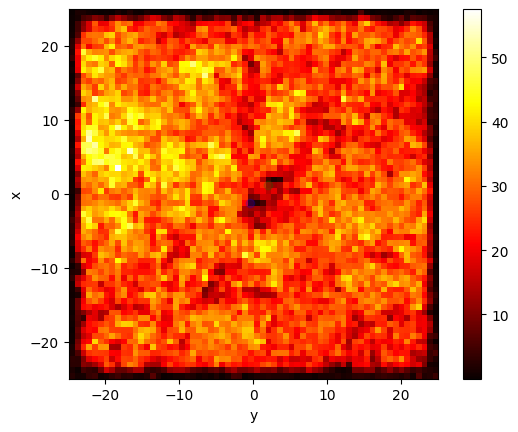

In [19]:
s = 70
print(np.shape(tracker.points))
v1_traj = tracker.points[0].getTrajectory()
v2_traj = tracker.points[1].getTrajectory()
box = g.snaps[s][int(L/2/dx):int(3*L/2/dx), int(L/2/dx):int(3*L/2/dx)]
plt.figure() 
plt.imshow(np.abs(box)**2, cmap = plt.cm.hot, origin = 'lower', extent = [-L/2, L/2, -L/2, L/2])
plt.colorbar() 
plt.scatter(v1_traj[s][0]-L/2,v1_traj[s][1]-L/2, color = 'blue', alpha = 0.2)
plt.scatter(v2_traj[s][0]-L/2,v2_traj[s][1]-L/2, color = 'green', alpha = 0.2)

plt.xlabel('y')
plt.ylabel('x')

plt.show() 

In [60]:
print(v1_traj[0]+[1,1])
print(v2_traj[0]+[1,1])

[25.609375 25.609375]
[29.515625 25.609375]


In [66]:
print(time_tracking)

[ 0.          0.07629395  0.15258789  0.22888184  0.30517578  0.38146973
  0.45776367  0.53405762  0.61035156  0.68664551  0.76293945  0.8392334
  0.91552734  0.99182129  1.06811523  1.14440918  1.22070312  1.29699707
  1.37329102  1.44958496  1.52587891  1.60217285  1.6784668   1.75476074
  1.83105469  1.90734863  1.98364258  2.05993652  2.13623047  2.21252441
  2.28881836  2.3651123   2.44140625  2.5177002   2.59399414  2.67028809
  2.74658203  2.82287598  2.89916992  2.97546387  3.05175781  3.12805176
  3.2043457   3.28063965  3.35693359  3.43322754  3.50952148  3.58581543
  3.66210938  3.73840332  3.81469727  3.89099121  3.96728516  4.0435791
  4.11987305  4.19616699  4.27246094  4.34875488  4.42504883  4.50134277
  4.57763672  4.65393066  4.73022461  4.80651855  4.8828125   4.95910645
  5.03540039  5.11169434  5.18798828  5.26428223  5.34057617  5.41687012
  5.49316406  5.56945801  5.64575195  5.7220459   5.79833984  5.87463379
  5.95092773  6.02722168  6.10351562  6.17980957  6.2

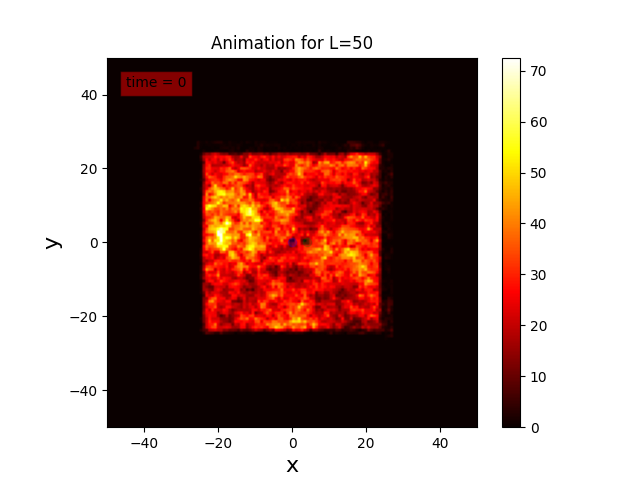

In [69]:
%matplotlib widget
time_tracking = np.arange(0, len(g.snaps))*250*g.gpeobj.dt


fig, ax = plt.subplots() 
data = plt.imshow(np.abs(g.snaps[0])**2, extent = [-g.winL/2, g.winL/2, -g.winL/2, g.winL/2], cmap = plt.cm.hot, origin = 'lower')


# set trajectories: 
v1_traj = tracker.points[0].getTrajectory()
v2_traj = tracker.points[1].getTrajectory()

v1 = plt.scatter(v1_traj[0][0]+0.5-L/2,v1_traj[0][1]+0.5-L/2, color = 'blue', alpha = 0.2)
v2 = plt.scatter(v2_traj[0][0]+0.5-L/2,v2_traj[0][1]+0.5-L/2, color = 'green', alpha = 0.2)

# plt.xlim(-5,5)
# plt.ylim(-5,5)

time_text = ax.text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes,  bbox=dict(facecolor='red', alpha=0.5))
time_text.set_text('time = 0')

plt.xlabel("x", fontsize = 16)
plt.ylabel('y', fontsize = 16)
plt.title(f'Animation for L={g.L}')
fig.colorbar(data)

def animate(i): 
    data.set_data(np.abs(g.snaps[i])**2)
    # fix these: 

    v1.set_offsets([v1_traj[i][0]+0.5-L/2,v1_traj[i][1]+0.5-L/2])
    v2.set_offsets([v2_traj[i][0]+0.5-L/2,v2_traj[i][1]+0.5-L/2])
    time_text.set_text('time = %.1d' % time_tracking[i]) # find an array that tracks the time or define one based on dt and the number of points 
    #return data, time_text
    return data
anim = animation.FuncAnimation(fig, animate, frames = len(g.snaps), blit = True)

plt.show()

#v1 = plt.scatter(g.xi[0][0][int((self.vortex_positions[0][0]+1)/self.dx+self.winL/4/self.dx)], self.xi[0][0][int((self.vortex_positions[0][1]+1)/self.dx+self.winL/4/self.dx)], color = 'blue', marker = '<', s = 20, alpha = 0.6)
#v2 = plt.scatter(g.xi[0][0][int((self.vortex_positions[0][2]+1)/self.dx+self.winL/4/self.dx)], self.xi[0][0][int((self.vortex_positions[0][3]+1)/self.dx+self.winL/4/self.dx)], color = 'blue', marker = '>', s = 20, alpha = 0.6)

In [ ]:
def animatepsi2d_vortex(self, filename, trajectories):
    if filename != None: 
        path = fr"C:\Users\TQC User\Desktop\BECs2\{filename}.mp4"

    fig, ax = plt.subplots() 
    data = plt.imshow(np.abs(self.snaps[0])**2, extent = [-self.winL/2, self.winL/2, -self.winL/2, self.winL/2],cmap = plt.cm.hot, origin = 'lower')

    if self.vortex: 
        v1 = plt.scatter(self.xi[0][0][int((self.vortex_positions[0][0]+1)/self.dx+self.winL/4/self.dx)], self.xi[0][0][int((self.vortex_positions[0][1]+1)/self.dx+self.winL/4/self.dx)], color = 'blue', marker = '<', s = 20, alpha = 0.6)
        v2 = plt.scatter(self.xi[0][0][int((self.vortex_positions[0][2]+1)/self.dx+self.winL/4/self.dx)], self.xi[0][0][int((self.vortex_positions[0][3]+1)/self.dx+self.winL/4/self.dx)], color = 'blue', marker = '>', s = 20, alpha = 0.6)
    
    time_text = ax.text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes,  bbox=dict(facecolor='red', alpha=0.5))
    time_text.set_text('time = 0')

    plt.xlabel("x", fontsize = 16)
    plt.ylabel('y', fontsize = 16)
    
    # plt.contour(self.xi[0], self.xi[1], self.Vs)
    
    plt.title(f'Animation for L={self.L}')
    fig.colorbar(data)

    def animate(i): 
        data.set_data(np.abs(self.snaps[i])**2)
        # fix these: 
        if self.vortex: 
            v1.set_offsets([self.xi[0][0][int((self.vortex_positions[i][0]+1)/self.dx+self.winL/4/self.dx)], self.xi[0][0][int((self.vortex_positions[i][1]+1)/self.dx+self.winL/4/self.dx)]])
            v2.set_offsets([self.xi[0][0][int((self.vortex_positions[i][2]+1)/self.dx+self.winL/4/self.dx)], self.xi[0][0][int((self.vortex_positions[i][3]+1)/self.dx+self.winL/4/self.dx)]])
        time_text.set_text('time = %.1d' % self.time_tracking[i])
        #return data, time_text
        return data, time_text, v1, v2
    anim = animation.FuncAnimation(fig, animate, frames = len(self.snaps), blit = True)

    plt.show() 
    
    anim.save(path)

    return anim

In [12]:
snap = 120
vortices, antivortices = pt.detectVortices(tracker, g.snaps[snap])
print(vortices)
print(antivortices)

IndexError: index 120 is out of bounds for axis 0 with size 9

[23.828125 26.953125]
[26.953125 26.953125]


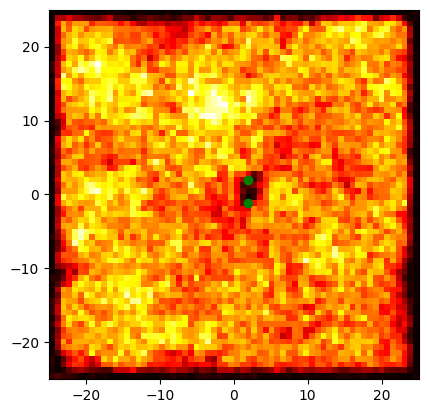

In [32]:
plt.figure() 
plt.imshow(np.abs(g.snaps[snap][int(g.L/2/g.dx):int(3*g.L/2/g.dx), int(g.L/2/g.dx):int(3*g.L/2/g.dx)])**2, cmap = plt.cm.hot, origin = 'lower', extent = [-g.L/2, g.L/2, -g.L/2, g.L/2])
for point in vortices: 
    plt.scatter(point[1]-L/2,point[0]-L/2, color = 'blue', alpha = 0.5)
for point in antivortices: 
    print(point) 
    plt.scatter(point[1]-L/2,point[0]-L/2, color = 'green')